<a href="https://colab.research.google.com/github/rw417/ids706_dataEng/blob/main/Project6_Text_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

This is a convenient location to collect data and store it for later use

In [31]:
from pathlib import Path
import spacy


In [3]:
#grab text
!rm *.txt
!wget https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/hemingway-sun-also-rises.txt

--2021-10-01 20:20:47--  https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/hemingway-sun-also-rises.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364659 (356K) [text/plain]
Saving to: ‘hemingway-sun-also-rises.txt’

hemingway-sun-also- 100%[===================>] 356.11K  --.-KB/s    in 0.08s   

2021-10-01 20:20:47 (4.62 MB/s) - ‘hemingway-sun-also-rises.txt’ saved [364659/364659]



In [7]:
sar_text = Path('hemingway-sun-also-rises.txt').read_text()

## EDA

### Word Visualizations

In [54]:
# get POS tags
from textblob import TextBlob
sar_blob = TextBlob(Path('hemingway-sun-also-rises.txt').read_text())
tags = sar_blob.tags

In [116]:
# lemmatization
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_words(words):
    all_words = []
    lemmatizer = WordNetLemmatizer()
    for word in words:
        w = word[0]
        t = word[1]
        if t.startswith('J'):
            new_w = lemmatizer.lemmatize(w, 'a')
        elif t.startswith('V'):
            new_w = lemmatizer.lemmatize(w, 'v')
        elif t.startswith('N'):
            new_w = lemmatizer.lemmatize(w, 'n')
        elif t.startswith('R'):
            new_w = lemmatizer.lemmatize(w, 'r')
        else:
            new_w = lemmatizer.lemmatize(w)
        all_words.append(new_w)
    return all_words

lemmatized_words = lemmatize_words(tags)

In [128]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [129]:
#remove stop words
from nltk.corpus import stopwords

def remove_stop(words, stop_words):
    no_stop = []
    for word in words:
        if word not in stop_words:
            no_stop.append(word)
    return no_stop

stop_words = stopwords.words('english')
no_stop_words = remove_stop(lemmatized_words, stop_words)


In [130]:
#without stop word removal
len(lemmatized_words)

69787

In [131]:
#the stop words are removed
len(no_stop_words)

40822

### Word cloud

(-0.5, 399.5, 199.5, -0.5)

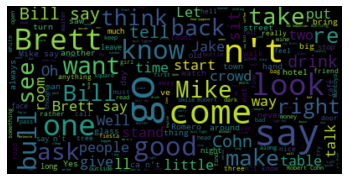

In [135]:
from wordcloud import WordCloud
word_cloud_text = str1 = ' '.join(no_stop_words)
wordcloud = WordCloud(max_font_size=50).generate(word_cloud_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")